In [1]:
import numpy as np
import math
import scipy as sp
import scipy.stats as st
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.sandbox.stats.multicomp as multi
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
import seaborn as sb


In [2]:
df = pd.read_csv('data_and_materials/CO2.csv',sep=',',skiprows=57,header=None)

In [3]:
###TAB1

#In 1958, Charles David Keeling (1928-2005) from the Scripps Institution of Oceanography began recording 
#carbon dioxide (CO2) concentrations in the atmosphere at an observatory located at about 3,400 m altitude 
#on the Mauna Loa Volcano on Hawaii Island. The location was chosen because it is not influenced by changing 
#CO2 levels due to the local vegetation and because prevailing wind patterns on this tropical island tend to 
#bring well-mixed air to the site. While the recordings are made near a volcano (which tends to produce CO2), 
#wind patterns tend to blow the volcanic CO2 away from the recording site. Air samples are taken several times 
#a day, and concentrations have been observed using the same measuring method for over 60 years. In addition, 
#samples are stored in flasks and periodically reanalyzed for calibration purposes. The observational study 
#is now run by Ralph Keeling, Charles's son. The result is a data set with very few interruptions and very 
#few inhomogeneities. It has been called the “most important data set in modern climate research."

##The data set for this problem can be found in CO2.csv. It provides the concentration of CO2 recorded at 
#Mauna Loa for each month starting March 1958. More description is provided in the data set file. We will be 
#considering only the CO2 concentration given in column 5. The goal of the problem is to fit the data and understand 
#its variations. You will encounter missing data points; part of the exercise is to deal with them appropriately.

#Let Ci be the average CO2 concentration in month i (i=1,2,⋯, counting from March 1958). We will look for a description of the form:

#Ci=F(ti)+Pi+Ri

#where:

#F:t↦F(t) accounts for the long-term trend.

#ti is time at the middle of the ith month, measured in fractions of years after Jan 15, 1958. Specifically, we take

#ti=i+0.512,i=0,1,…,
 
#where i=0 corresponds to Jan, 1958, adding 0.5 is because the first measurement is halfway through the first month.

#Pi is periodic in i with a fixed period, accounting for the seasonal pattern.

#Ri is the remaining residual that accounts for all other influences.

#The decomposition is meaningful only if the range of F is much larger than the amplitude of the Pi and this amplitude 
#in turn is substantially larger than that of Ri. You are required to split the data into training and test datasets - 
#you can perform an 80:20 split. All model fitting should be done only on the training set and all the remaining data 
#should be used for evaluation (for the purpose of model selection), i.e. prediction errors should be reported with 
#respect to the test set. 

#At the end of this problem you should be able to 
# Handle incomplete data sets using at least using one method. 
#Perform time series regression and find the deterministic and periodic trends in data.
#Interpret residuals.

###Pre-Processing data

#You may notice that there are some inhomogeneities in data and the CO2 concentration at these points is recorded as -99.99. 
#Before proceeding, we must clean the data. One simple way to do this is to drop all missing values from the table. 
#For the purpose of the problems below, use this simple method of dropping all the missing values.

#Other methods include forward filling–fill missing values with previous values, and interpolation.

#The pre-processing should be done before splitting data.






In [4]:
df.columns=('yr','mn','datem','date','co2','season','fit','seasonf','co2_2','season_2')
t = np.array((df.index+0.5)/12) #rearranged time index

,yr,mn,datem,date,co2,season,fit,seasonf,co2_2,season_2
0,1958,1,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958,2,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
5,1958,6,21351,1958.4548,-99.99,-99.99,317.24,315.14,317.24,315.14
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19
8,1958,9,21443,1958.7068,313.21,316.08,312.46,315.35,313.21,316.08
9,1958,10,21473,1958.7890,-99.99,-99.99,312.44,315.40,312.44,315.40


In [6]:
#df2 = df.drop(index=[0,1])
#df2.columns = df2.columns.str.strip()

df2 = df[df['co2']!=-99.99] #remove all values with missing CO2
t2 = t[df['co2']!=-99.99]

In [53]:
t2.shape

(734,)

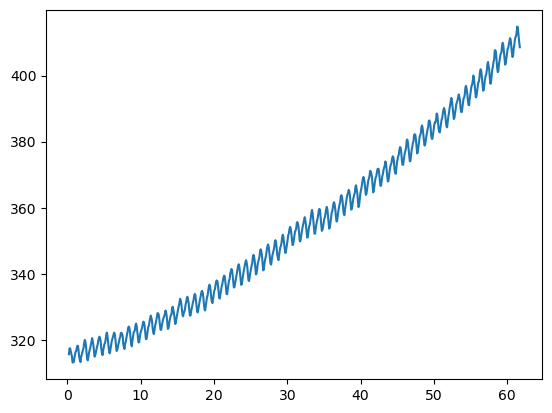

In [7]:
plt.plot(t2,df2['co2'])

In [8]:
x = np.array(t2.reshape(-1,1))
#y = np.array(df2).reshape(-1,1)
y = df2.copy()
#reg = LinearRegression().fit(t2,Y)

(Text(0.5, 0, 'time (years)'), Text(0, 0.5, 'CO2 concentration (ppm)'))

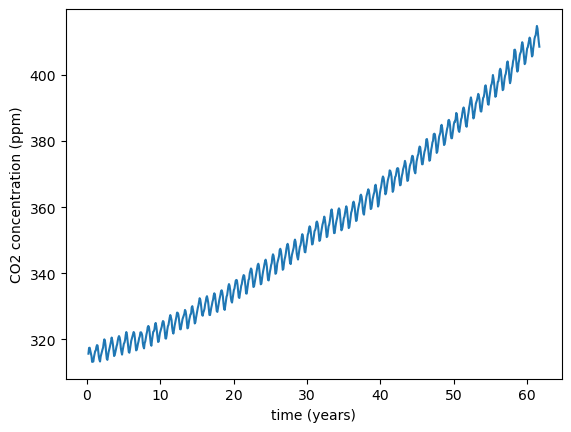

In [9]:
plt.plot(x,y['co2'])
plt.xlabel('time (years)'),plt.ylabel('CO2 concentration (ppm)')

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=False)

In [77]:
x_train

array([[49.54166667],
       [49.625     ],
       [49.70833333],
       [49.79166667],
       [49.875     ],
       [49.95833333],
       [50.04166667],
       [50.125     ],
       [50.20833333],
       [50.29166667],
       [50.375     ],
       [50.45833333],
       [50.54166667],
       [50.625     ],
       [50.70833333],
       [50.79166667],
       [50.875     ],
       [50.95833333],
       [51.04166667],
       [51.125     ],
       [51.20833333],
       [51.29166667],
       [51.375     ],
       [51.45833333],
       [51.54166667],
       [51.625     ],
       [51.70833333],
       [51.79166667],
       [51.875     ],
       [51.95833333],
       [52.04166667],
       [52.125     ],
       [52.20833333],
       [52.29166667],
       [52.375     ],
       [52.45833333],
       [52.54166667],
       [52.625     ],
       [52.70833333],
       [52.79166667],
       [52.875     ],
       [52.95833333],
       [53.04166667],
       [53.125     ],
       [53.20833333],
       [53

In [78]:
lr = LinearRegression().fit(x_train,y_train['co2'])

In [89]:
lr.score(x_train,y_train['co2']),lr.score(x_train,y_train['co2'])

(-0.4916310593054052, 0.9764754552037069)

In [87]:
ypred = lr.predict(x)
ypred_train = lr.predict(x_train)


In [88]:
ypred_train

array([378.68148076, 378.79870502, 378.91592928, 379.03315355,
       379.15037781, 379.26760207, 379.38482633, 379.5020506 ,
       379.61927486, 379.73649912, 379.85372338, 379.97094765,
       380.08817191, 380.20539617, 380.32262043, 380.4398447 ,
       380.55706896, 380.67429322, 380.79151748, 380.90874175,
       381.02596601, 381.14319027, 381.26041453, 381.3776388 ,
       381.49486306, 381.61208732, 381.72931158, 381.84653585,
       381.96376011, 382.08098437, 382.19820863, 382.3154329 ,
       382.43265716, 382.54988142, 382.66710568, 382.78432995,
       382.90155421, 383.01877847, 383.13600273, 383.253227  ,
       383.37045126, 383.48767552, 383.60489978, 383.72212405,
       383.83934831, 383.95657257, 384.07379683, 384.1910211 ,
       384.30824536, 384.42546962, 384.54269388, 384.65991814,
       384.77714241, 384.89436667, 385.01159093, 385.12881519,
       385.24603946, 385.36326372, 385.48048798, 385.59771224,
       385.71493651, 385.83216077, 385.94938503, 386.06

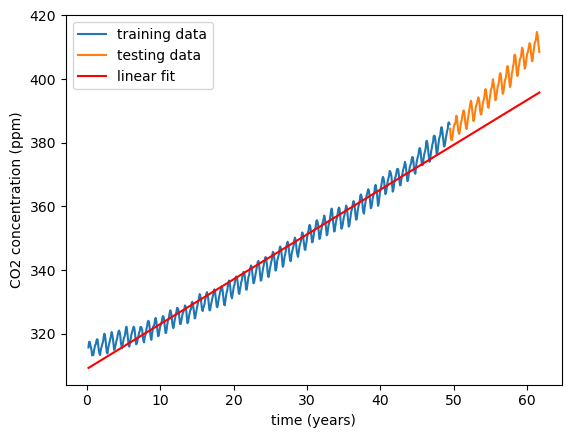

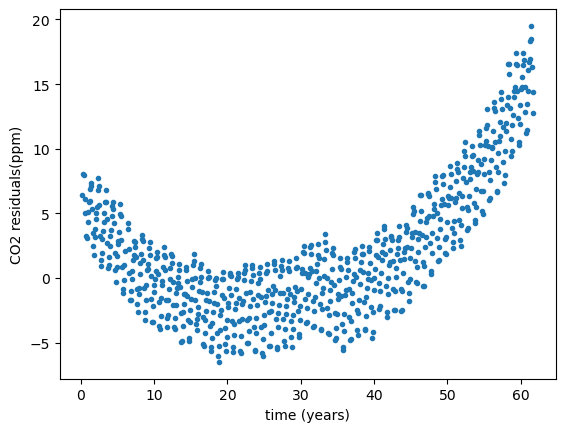

In [93]:
plt.plot(x_train,y_train['co2'],label='training data')
plt.plot(x_test,y_test['co2'],label='testing data')
plt.plot(x,ypred,'r',label='linear fit') #plot of the fit + data
plt.xlabel('time (years)'),plt.ylabel('CO2 concentration (ppm)')
plt.legend()
plt.show()
resid = y['co2']-ypred.flatten()
plt.plot(x,resid,'.') #plot of the residuals
plt.xlabel('time (years)'),plt.ylabel('CO2 residuals(ppm)')
plt.show()

In [91]:
print('Slope:',lr.coef_[0], '| Intercept',lr.intercept_)

Slope: 1.4066911494215175 | Intercept 308.9916567323666


In [92]:
print('RMSE:',mean_squared_error(y_test['co2'],ypred_test,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test['co2'],ypred_test)*100)


RMSE: 10.641458521874679
MAPE: 2.450454956443145


In [18]:
np.std(y_test['co2']-ypred_train.flatten())

4.306344125938813

In [19]:
###fitting a quadratic model
x2 = x**2

In [20]:
x2 = np.column_stack((x,x**2))

In [21]:
x_train2,x_train2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.20,shuffle=True)

In [22]:
lr2 = LinearRegression().fit(x_train2,y_train2['co2'])

In [58]:
plt.plot(x_test2[:,0],y_test2['co2'],'.',label='test subsample')
plt.xlabel('time (years)'),plt.ylabel('CO2 concentration (ppm)')

(Text(0.5, 23.52222222222222, 'time (years)'),
 Text(38.097222222222214, 0.5, 'CO2 concentration (ppm)'))

In [238]:
x2 = np.column_stack((x,x**2))
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.20,shuffle=False)
lr2 = LinearRegression().fit(x_train2,y_train2['co2'])
print('Coefficients:',lr2.coef_,' | Intercept',lr2.intercept_)
ypred_train2 = lr2.predict(x_train2)
ypred_test2 = lr2.predict(x_test2)
print('RMSE:',mean_squared_error(y_test2['co2'],ypred_test2,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test2['co2'],ypred_test2)*100)

Coefficients: [0.80209702 0.0121175 ]  | Intercept 314.1005841870842
RMSE: 2.5013322194897825
MAPE: 0.5320319129740849


In [95]:
lr2.score(x_test2,y_test2['co2']),lr2.score(x_train2,y_train2['co2'])

(0.9175858356919125, 0.9882301911588206)

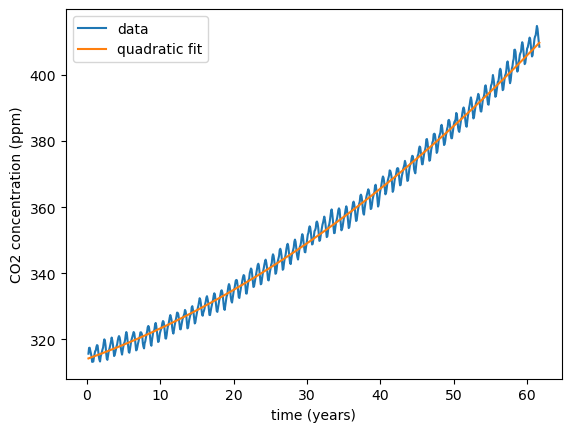

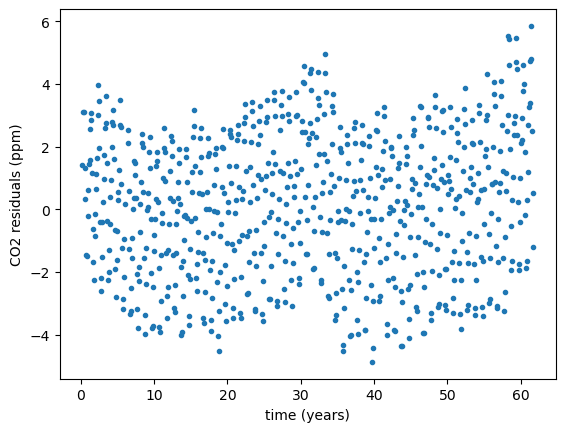

In [120]:
ypred2 = lr2.predict(x2)
plt.plot(x,y['co2'],label='data')
plt.plot(x,ypred2,label='quadratic fit')
plt.xlabel('time (years)'),plt.ylabel('CO2 concentration (ppm)')
plt.legend()
plt.show()
#residuals
plt.plot(x,y['co2']-ypred2,'.')
plt.xlabel('time (years)'),plt.ylabel('CO2 residuals (ppm)')
plt.show()

In [118]:
print('Coefficients:',lr2.coef_,' | Intercept',lr2.intercept_)

Coefficients: [0.80209702 0.0121175 ]  | Intercept 314.1005841870842


In [44]:
#residuals
#plt.plot(x,y-ypred2,'.')

In [45]:
ypred_test2 = lr2.predict(x_test2)
print('RMSE:',mean_squared_error(y_test2['co2'],ypred_test2,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test2['co2'],ypred_test2)*100)


RMSE: 2.344357303470726
MAPE: 0.49334737628793984


In [ ]:
###Fitting a cubic model
x3 = np.column_stack((t2,t2**2,t2**3))


In [ ]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y,test_size=0.20,shuffle=False)

In [ ]:
regr3 = LinearRegression().fit(x_train3,y_train3)

In [ ]:
regr3.score(x_test3,y_test3),regr3.score(x_train3,y_train3)

(0.7732101681255958, 0.9884054161458382)

In [ ]:
ypred3 = regr3.predict(x3)

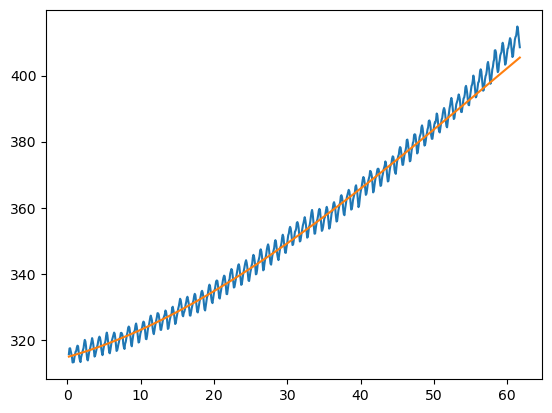

In [ ]:
plt.plot(t2,y,t2,ypred3)

In [ ]:
print('Coefs:',regr3.coef_[0]) #slope
print('Intercept',regr3.intercept_[0])


Coefs: [ 6.24895409e-01  2.09575674e-02 -1.18323397e-04]
Intercept 314.85852615628914


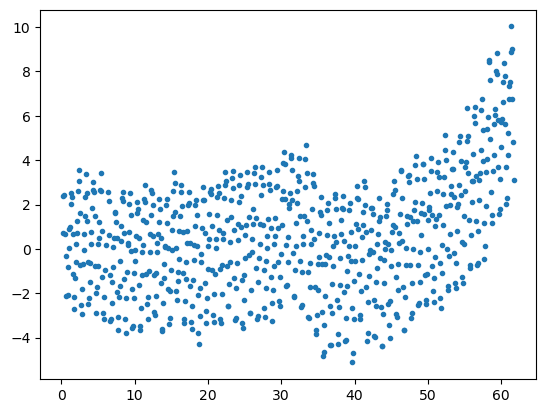

In [ ]:
plt.plot(t2,y-ypred3,'.')

In [ ]:
ypred_test3 = regr3.predict(x_test3)
print('RMSE:',mean_squared_error(y_test3,ypred_test3,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test3,ypred_test3)*100)

RMSE: 4.149370712134871
MAPE: 0.8483502723897437


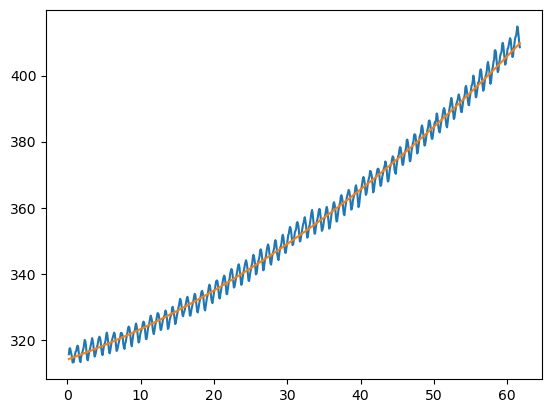

In [98]:
###Fitting a periodic signal
###preparing database to use only training
#residuals
ypred_train2 = lr2.predict(x_train2)
res = y_train2['co2']-ypred_train2 #remove the deterministic trend from the data
y_train2['res'] = res #adding the residuals to the dataframe
plt.plot(x,y['co2'],x,ypred2)

In [99]:
periodic = np.zeros(12)
periodic2 = np.zeros(12)

for n in range(len(periodic)) :
    periodic[n] = y_train2[y_train2['mn']== n+1]['res'].values.mean()
    periodic2[n] = np.median(y_train2[y_train2['mn']== n+1]['res'].values)


#for n in range(12) :
#    periodic[n] = dfp[dfp['mn'] == n+1]['res'].values.mean()
#    periodic2[n] = np.median(dfp[dfp['mn'] == n+1]['res'].values)

#t2 = dfp.sort_values(by='mn')
#periodic2 = t2['co2'].median()

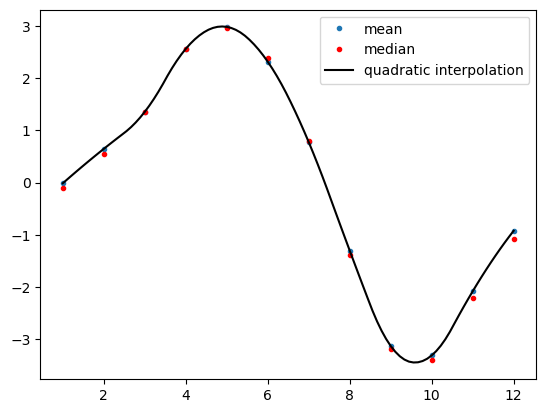

In [100]:
xp = range(1,13)
xinterp = np.linspace(1,12,100)
finterp = sp.interpolate.interp1d(xp,periodic,kind='quadratic')
plt.plot(xp,periodic,'.',label='mean')
plt.plot(xp,periodic2,'r.',label='median')
plt.plot(xinterp,finterp(xinterp),'k',label='quadratic interpolation')
plt.legend()

In [ ]:
#sb.lineplot(x=xp,y=y_train2['res'].groupby('mn'))
y_train2.groupby(['mn'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'show'

/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(Text(0.5, 0, 'Month'), Text(0, 0.5, 'Periodic signal (ppm)'))

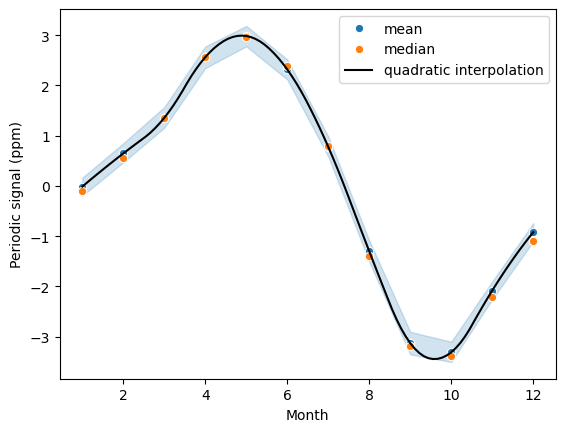

In [101]:
#n=0
#df2[df2['mn'] == n+1]['co2'].values.mean()
xp = range(1,13)
xinterp = np.linspace(1,12,100)
finterp = sp.interpolate.interp1d(xp,periodic,kind='quadratic')

sb.lineplot(y_train2,x='mn',y='res',marker='o',linestyle='',label='mean')
sb.lineplot(y_train2,x='mn',y='res',estimator='median',marker='o',linestyle='',label='median',errorbar=None)
sb.lineplot(x=xinterp,y=finterp(xinterp),color='black',label='quadratic interpolation')
plt.xlabel('Month'),plt.ylabel('Periodic signal (ppm)')

([<matplotlib.lines.Line2D at 0x7f6b6eb59c10>],
 <matplotlib.legend.Legend at 0x7f6b6eaf3760>)

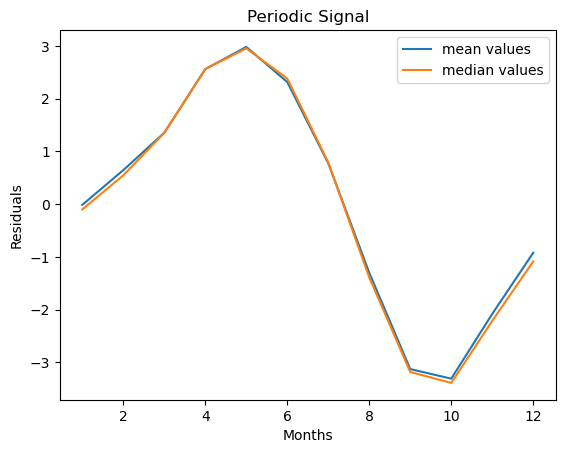

In [ ]:
x = np.arange(1,13)
plt.plot(x,periodic,label='mean values'),plt.xlabel('Months'),plt.ylabel('Residuals'),plt.title('Periodic Signal')
plt.plot(x,periodic2,label='median values'),plt.legend()

In [35]:
periodic
#x = np.linspace(1,12,12000)
#plt.plot(periodic)
#yi = sp.interpolate.interp1d(x,periodic)
#plot(x,y,x,yi)


array([-0.02924442,  0.67911381,  1.31090993,  2.50241602,  3.04388374,
        2.27112484,  0.75480648, -1.44366191, -3.26950436, -3.27157788,
       -2.10185443, -0.89055335])

In [ ]:
?sp.interpolate.interp1d

In [ ]:
df2

,yr,mn,datem,date,co2,season,fit,seasonf,co2_2,season_2
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19
...,...,...,...,...,...,...,...,...,...,...
736,2019,5,43600,2019.3699,414.83,411.42,414.53,411.12,414.83,411.42
737,2019,6,43631,2019.4548,413.96,411.38,413.89,411.33,413.96,411.38
738,2019,7,43661,2019.5370,411.85,411.03,412.32,411.54,411.85,411.03
739,2019,8,43692,2019.6219,410.08,411.62,410.17,411.75,410.08,411.62


In [103]:
ypred2

array([[1.95770956e+03, 6.48531969e+00, 2.12599826e+04, ...,
        3.14189817e+02, 3.14268214e+02, 3.14201235e+02],
       [1.95779285e+03, 6.48577347e+00, 2.12904206e+04, ...,
        3.14257911e+02, 3.14335560e+02, 3.14269253e+02],
       [1.95787615e+03, 6.48622517e+00, 2.13208586e+04, ...,
        3.14326170e+02, 3.14403075e+02, 3.14337436e+02],
       ...,
       [2.01906169e+03, 6.25970954e+00, 4.36619378e+04, ...,
        4.09085158e+02, 4.09356508e+02, 4.09095179e+02],
       [2.01914511e+03, 6.25864062e+00, 4.36923747e+04, ...,
        4.09275098e+02, 4.09547722e+02, 4.09285191e+02],
       [2.01922854e+03, 6.25756964e+00, 4.37228115e+04, ...,
        4.09465203e+02, 4.09739105e+02, 4.09475369e+02]])

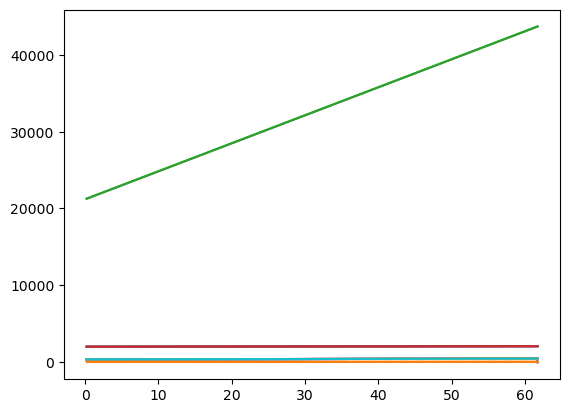

In [119]:
###show the model on top of the entire series
###fitting a quadratic model

#x2 = np.column_stack((t2,t2**2))
#x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y,test_size=0.20,shuffle=False)
#regr2 = LinearRegression().fit(x_train2,y_train2)
#regr2.score(x_test2,y_test2),regr2.score(x_train2,y_train2)
#ypred2 = regr2.predict(x2)
#ypred_train = regr2.predict(x_train2)
#ypred_test = regr2.predict(x_test2)
#plt.plot(t2,y,t2,ypred2)

[]

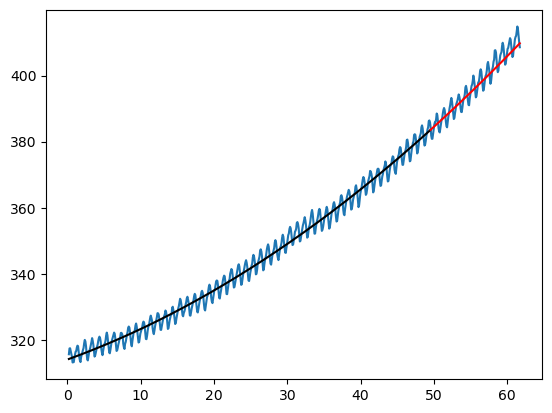

In [ ]:
#we will place our model on top of the full data
%matplotlib inline
plt.plot(t2,y)
plt.plot(x_train2[:,0],ypred_train,'k')
plt.plot(x_test2[:,0],ypred_test,'r')
plt.plot()


In [343]:
print('RMSE:',mean_squared_error(y_test2['co2'],y_test2['final'],squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test2['co2'],y_test2['final'])*100)


RMSE: 1.149360269079452
MAPE: 0.2085916594799123


In [191]:
#Introducing a periodic signal
tfinal = np.column_stack((t,t**2))
ypredfinal = lr2.predict(tfinal) #we need this because there are missteps
y_final = np.zeros(len(ypredfinal))
m = 0
for n in range(len(ypredfinal)) :

    y_final[n] = ypredfinal[n] + periodic[m]
    if (m == 11) : m = -1 #december cycle

    m = m + 1



In [301]:


y_train2['periodic'] = 0
y_test2['periodic'] = 0
for n in range(len(periodic)) : 
    y_train2['periodic'].loc[y_train2['mn']== n+1] = periodic[n]
    y_test2['periodic'].loc[y_test2['mn'] == n+1] = periodic[n]

y_train2['final'] = ypred_train2+y_train2['periodic']
y_test2['final'] = ypred_test2+y_test2['periodic']



#yf = np.zeros(len(ypred2))
#m = 2
#for n in range(len(ypred2)) :
#
#    yf[n] = y[n] + periodic[m]
#
#    if (m == 11) : m = -1
#
#    m = m +
#%matplotlib qt
#plt.plot()
#plt.plot(x_train[:-2],y_train['co2'][2:],'.


/tmp/ipykernel_38722/2322641648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train2['periodic'].loc[y_train2['mn']== n+1] = periodic[n]
/tmp/ipykernel_38722/2322641648.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.01291921890640424' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_train2['periodic'].loc[y_train2['mn']== n+1] = periodic[n]
/tmp/ipykernel_38722/2322641648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test2['periodic'].loc[y_test2['mn'] == n+1] = periodic[n]
/tmp/ipyk

In [262]:
%matplotlib qt


sb.lineplot(x=x_train2[:,0],y=y_train2['co2'],marker='o',markersize=3,linewidth=0,label='training data')
sb.lineplot(x=x_test2[:,0],y=y_test2['co2'],marker='o',markersize=3,linewidth=0,color='black',label='testing data')
sb.lineplot(x=x_train2[:,0],y=y_train2['final'],color='red',label='final model')
sb.lineplot(x=x_test2[:,0],y=y_test2['final'],color='orange',label='prediction')
plt.xlabel('time (years)'),plt.ylabel('CO2 concentration (ppm)')
plt.show()
plt.figure()
sb.lineplot(x=t2[100:200],y=y['co2'][100:200],marker='o',markersize=3,linewidth=0,label='data')
#sb.lineplot(x=x_test2[:,0][0:100],y=y_test2['co2'][0:100],marker='o',markersize=3,linewidth=0,color='black',label='testing data')
sb.lineplot(x=t[(100+7):(200+7)],y=y_final[(100+7):(200+7)],color='red',label='final model')
plt.xlabel('time (years)'),plt.ylabel('CO2 concentration (ppm)')

#plt.plot(x_test2[:,0],y_test2['co2'],'.',label='testing data')
#plt.plot(x,y_final,'r',label='final model')


#plt.figure(figsize=(12,9))
#plt.plot(t2,y,label='data')
#plt.plot(x_train2[:,0],yf[:len(x_train2)],'r',label='training')
#plt.plot(x_test2[:,0],yf[len(x_train2):],'y',label='testing')
#plt.legend(loc=4),plt.xlabel('Fractions of Years'),plt.ylabel('CO² (ppm)'),plt.title('Mauna Loa CO² concentrations 1958-2019')

/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vneves/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(Text(0.5, 0, 'time (years)'), Text(0, 0.5, 'CO2 concentration (ppm)'))

In [323]:
#Coefficient of determination
rss_test = ((y_test2['co2']-y_test2['final'])**2).sum()
ss_test = ((y_test['co2']-y_test['co2'].mean())**2).sum()
r2_test = 1-rss_test/ss_test

rss_train = ((y_train2['co2']-y_train2['final'])**2).sum()
ss_train = ((y_train['co2']-y_train['co2'].mean())**2).sum()
r2_train = 1-rss_train/ss_train

In [325]:
print(r2_test,r2_train)

0.9825991098444042 0.9987463513547911


<>:3: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_38722/2076586492.py:3: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  plt.xlabel('time' (years)),plt.ylabel('CO2 concentration ⁽ppm')


NameError: name 'years' is not defined

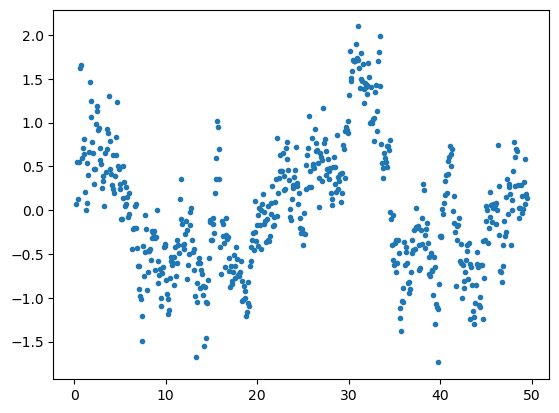

In [344]:
rfinal = y_train2['co2']-y_train2['final']
plt.plot(x_train,rfinal,'.')
plt.xlabel('time' (years)),plt.ylabel('CO2 concentration ⁽ppm')

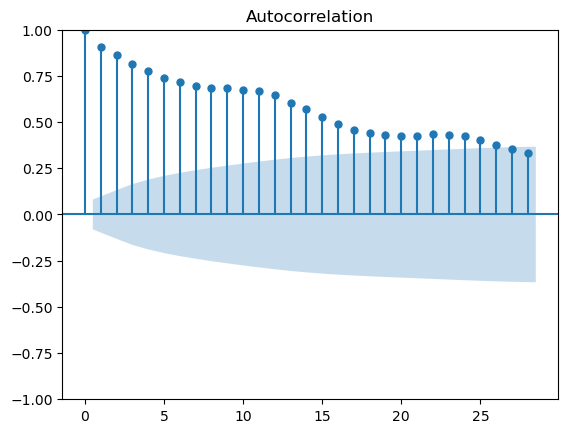

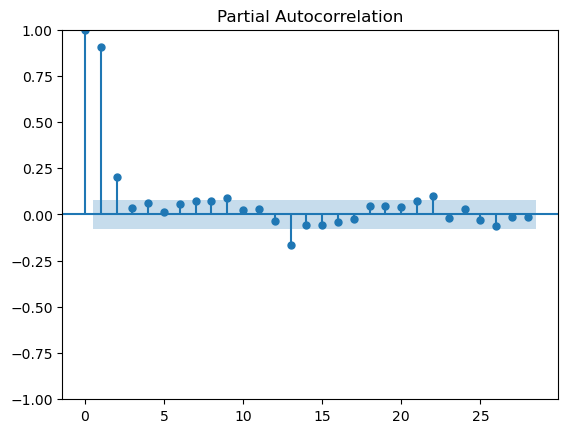

In [338]:
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(rfinal)
plt.show()
plot_pacf(rfinal)
plt.show()

In [342]:
print ("Amplitude of Trend : ")
Amp_trend=y_train2['co2'].max()-y_train2['co2'].min()
print(Amp_trend)
print ("\nAmplitude of Periodic Signal : ")
Amp_p=y_train2['periodic'].max()-y_train2['periodic'].min()
print(Amp_p)

print ("\nRatio of amplitudes of trend to periodic signal : ")
print(Amp_trend/Amp_p)

print ("\nAmplitude of Residuals : ")
Amp_res=rfinal.max()-rfinal.min()
print(Amp_res)

print ("\nRatio of amplitudes of periodic signal  to residuals : ")
print(Amp_p/Amp_res)


print ("\nMedian of absolute value of Periodic Signal : ")
median_abs_p=(y_train2['periodic'].abs()).median()
print(median_abs_p)
print ("\nMedian of absolute Residual : ") 
median_abs_r=(rfinal.abs()).median()
print(median_abs_r)
print ("\nRatio of amplitudes of periodic signal  to residuals : ")
print(median_abs_p/median_abs_r)
      

Amplitude of Trend : 
73.20000000000005

Amplitude of Periodic Signal : 
6.29241066715961

Ratio of amplitudes of trend to periodic signal : 
11.633061456404034

Amplitude of Residuals : 
3.836399237579542

Ratio of amplitudes of periodic signal  to residuals : 
1.6401866118422055

Median of absolute value of Periodic Signal : 
2.081486740992056

Median of absolute Residual : 
0.49333288570340983

Ratio of amplitudes of periodic signal  to residuals : 
4.219233708744564


In [ ]:
#plt.figure(figsize=(12,9))

#plt.plot(t.flatten(),y_final-y)

t2.shape,y_final.shape

((734,), (734,))

In [341]:
y_train2

,yr,mn,datem,date,co2,season,fit,seasonf,co2_2,season_2,periodic,final
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43,1.355569,315.623783
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16,2.561858,316.897418
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71,2.982891,317.385965
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19,0.776297,315.314906
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19,-1.301213,313.305416
...,...,...,...,...,...,...,...,...,...,...,...,...
589,2007,2,39128,2007.1260,383.71,382.98,383.61,382.87,383.71,382.98,0.646407,383.392752
590,2007,3,39156,2007.2027,384.34,382.84,384.52,383.01,384.34,382.84,1.355569,384.268053
591,2007,4,39187,2007.2877,386.23,383.53,385.89,383.17,386.23,383.53,2.561858,385.640647
592,2007,5,39217,2007.3699,386.41,383.13,386.61,383.33,386.41,383.13,2.982891,386.228154


In [ ]:
y = y.T[0]

In [ ]:
yf-y

array([ 1.35556911,  2.56185806,  2.98289083,  2.31647273,  0.77629741,
       -1.30121251, -3.1280744 , -3.30951984, -2.08148674, -0.92150659,
       -0.01291922,  0.6464066 ,  1.35556911,  2.56185806,  2.98289083,
        2.31647273,  0.77629741, -1.30121251, -3.1280744 , -3.30951984,
       -2.08148674, -0.92150659, -0.01291922,  0.6464066 ,  1.35556911,
        2.56185806,  2.98289083,  2.31647273,  0.77629741, -1.30121251,
       -3.1280744 , -3.30951984, -2.08148674, -0.92150659, -0.01291922,
        0.6464066 ,  1.35556911,  2.56185806,  2.98289083,  2.31647273,
        0.77629741, -1.30121251, -3.1280744 , -3.30951984, -2.08148674,
       -0.92150659, -0.01291922,  0.6464066 ,  1.35556911,  2.56185806,
        2.98289083,  2.31647273,  0.77629741, -1.30121251, -3.1280744 ,
       -3.30951984, -2.08148674, -0.92150659, -0.01291922,  0.6464066 ,
        1.35556911,  2.56185806,  2.98289083,  2.31647273,  0.77629741,
       -1.30121251, -3.1280744 , -3.30951984, -2.08148674, -0.92